In [1]:
import torch
import random
import numpy as np
import torchvision.datasets
from torchvision import transforms

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.ToTensor(),
    ])

# 102 Category Flower Dataset

0: 'pink primrose',

1: 'hard-leaved pocket orchid',

2: 'canterbury bells',

 3: 'sweet pea',

 4: 'english marigold',

5: 'tiger lily',

6: 'moon orchid',

7: 'bird of paradise',

8: 'monkshood',

9: 'globe thistle',

10: 'snapdragon',

11: "colt's foot",

12: 'king protea',

13: 'spear thistle',

14: 'yellow iris',

15: 'globe-flower',

16: 'purple coneflower',

17: 'peruvian lily',

18: 'balloon flower',

19: 'giant white arum lily',

20: 'fire lily',

21: 'pincushion flower',

22: 'fritillary',

23: 'red ginger',

24: 'grape hyacinth',

25: 'corn poppy',

26: 'prince of wales feathers',

27: 'stemless gentian',

28: 'artichoke',

29: 'sweet william',

30: 'carnation',

31: 'garden phlox',

32: 'love in the mist',

33: 'mexican aster',

34: 'alpine sea holly',

35: 'ruby-lipped cattleya',

36: 'cape flower',

37: 'great masterwort',

38: 'siam tulip',

39: 'lenten rose',

40: 'barbeton daisy',

41: 'daffodil',

42: 'sword lily',

43: 'poinsettia',

44: 'bolero deep blue',

45: 'wallflower',

46: 'marigold',

47: 'buttercup',

48: 'oxeye daisy',

49: 'common dandelion',

50: 'petunia',

51: 'wild pansy',

52: 'primula',

53: 'sunflower',

54: 'pelargonium',

55: 'bishop of llandaff',

56: 'gaura',

57: 'geranium',

58: 'orange dahlia',

59: 'pink-yellow dahlia',

60: 'cautleya spicata',

61: 'japanese anemone',

62: 'black-eyed susan',

63: 'silverbush',

64: 'californian poppy',

65: 'osteospermum',

66: 'spring crocus',

67: 'bearded iris',

68: 'windflower',

69: 'tree poppy',

70: 'gazania',

71: 'azalea',

72: 'water lily',

73: 'rose',

74: 'thorn apple',

75: 'morning glory',

76: 'passion flower',

77: 'lotus lotus',

78: 'toad lily',

79: 'anthurium',

80: 'frangipani',

81: 'clematis',

82: 'hibiscus',

83: 'columbine',

84: 'desert-rose',

85: 'tree mallow',

86: 'magnolia',

87: 'cyclamen',

88: 'watercress',

89: 'canna lily',

90: 'hippeastrum',

91: 'bee balm',

92: 'ball moss',

93: 'foxglove',

94: 'bougainvillea',

95: 'camellia',

96: 'mallow',

97: 'mexican petunia',

98: 'bromelia',

99: 'blanket flower',

100: 'trumpet creeper',

101: 'blackberry lily'

In [3]:
test_data = torchvision.datasets.Flowers102('./', split='train', download=True, transform=transform)
train_data = torchvision.datasets.Flowers102('./', split='test', transform=transform)
val_data = torchvision.datasets.Flowers102('./', split='val', transform=transform)

100%|██████████| 345M/345M [00:14<00:00, 24.0MB/s]


Extracting flowers-102/102flowers.tgz to flowers-102


100%|██████████| 502/502 [00:00<00:00, 870kB/s]


100%|██████████| 15.0k/15.0k [00:00<00:00, 20.2MB/s]


In [4]:
len(train_data), len(val_data), len(test_data)

(6149, 1020, 1020)

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

In [6]:
X_test, y_test = next(iter(test_dataloader))

In [7]:
X_train, y_train = next(iter(train_dataloader))
print(f"Feature batch shape: {X_train.size()}")
print(f"Labels batch shape: {y_train.size()}")

Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


## Нейроная сеть VGG16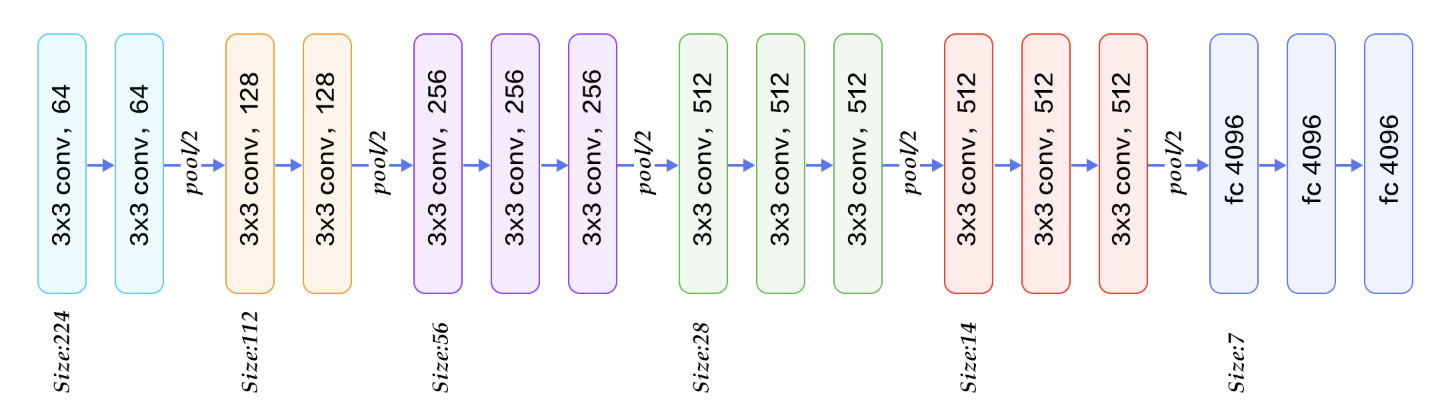

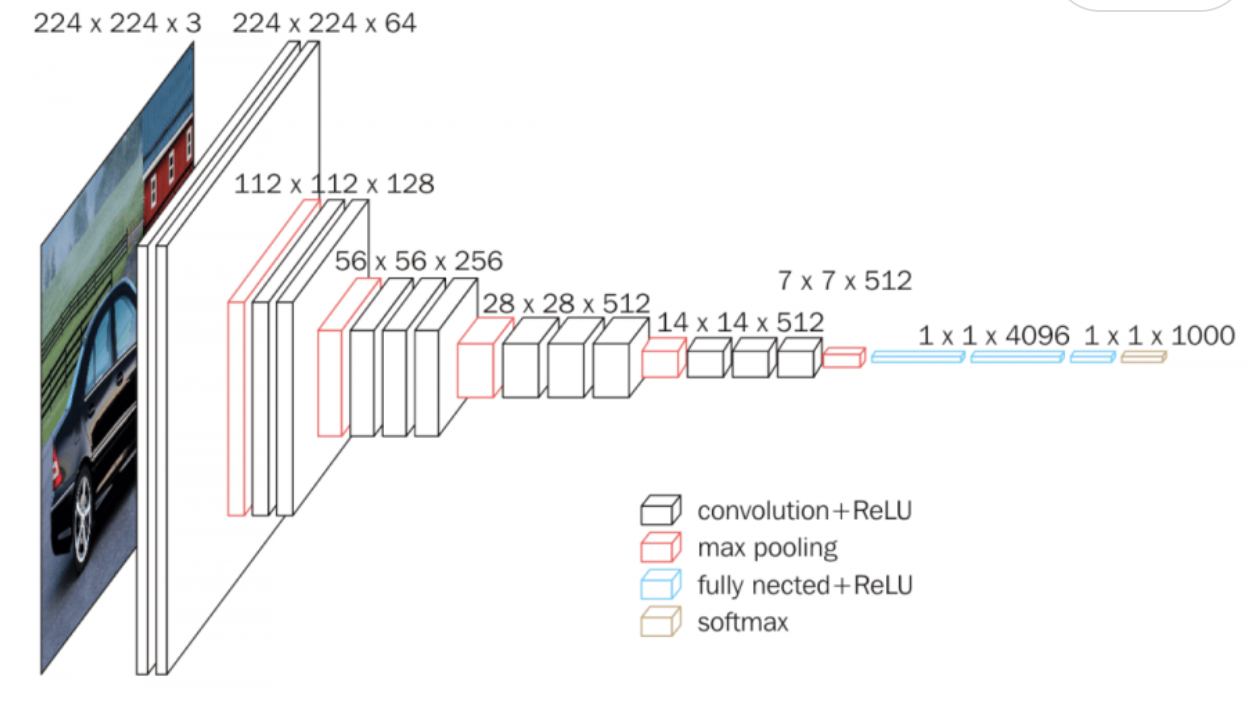

Архитектура сети:

In [8]:
class VGG16(torch.nn.Module):
    def __init__(self, num_classes=102):
        super(VGG16, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU())
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU())
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU())
        self.layer6 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU())
        self.layer7 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU())
        self.layer9 = torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU())
        self.layer10 = torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU())
        self.layer12 = torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU())
        self.layer13 = torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(7*7*512, 4096),
            torch.nn.ReLU())
        self.fc1 = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU())
        self.fc2= torch.nn.Sequential(
            torch.nn.Linear(4096, num_classes))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

vgg16 = VGG16()

In [9]:
print(vgg16)

VGG16(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

vgg16 = vgg16.to(device)

In [11]:
device

device(type='cuda', index=0)

In [12]:
optimizer = torch.optim.Adam(vgg16.parameters(), lr=1.0e-3)

loss = torch.nn.CrossEntropyLoss()

In [13]:
# чтобы посмотреть, как и что у нас тут менялось при оптимизации на тестовой выборке
test_accuracy_history = []
test_loss_history = []


train_loss_history = []

# не забываем отправить все выборки на устройство, на котором обучаем
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(50):
    for X,y in train_dataloader:
        # обязательно обнуляем градиенты
        optimizer.zero_grad()

        X_batch = X.to(device)
        y_batch = y.to(device)

        # делаем предсказание
        preds = vgg16.forward(X_batch)

        # считаем лосс значение
        loss_value = loss(preds, y_batch)

        # берем градиенты
        loss_value.backward()

        # и пусть оптимайзер все оптимизирует
        optimizer.step()

    # смотрим, что он тут нам напредсказывал, не забывая вовремя отправлять на cpu
    train_loss_history.append(loss_value.data.cpu())

    for X,y in test_dataloader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)

      test_preds = vgg16.forward(X_test)
      loss_test = loss(test_preds, y_test)

    test_loss_history.append(loss_test.data.cpu())


    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(f"epoch{epoch} - accuracy test {accuracy} ")

epoch0 - accuracy test 0.03125 
epoch1 - accuracy test 0.0625 
epoch2 - accuracy test 0.0625 
epoch3 - accuracy test 0.03125 
epoch4 - accuracy test 0.03125 
epoch5 - accuracy test 0.09375 
epoch6 - accuracy test 0.03125 
epoch7 - accuracy test 0.03125 
epoch8 - accuracy test 0.03125 
epoch9 - accuracy test 0.03125 
epoch10 - accuracy test 0.03125 
epoch11 - accuracy test 0.09375 
epoch12 - accuracy test 0.0625 
epoch13 - accuracy test 0.0625 
epoch14 - accuracy test 0.0625 
epoch15 - accuracy test 0.0625 
epoch16 - accuracy test 0.03125 
epoch17 - accuracy test 0.03125 
epoch18 - accuracy test 0.03125 
epoch19 - accuracy test 0.09375 
epoch20 - accuracy test 0.15625 
epoch21 - accuracy test 0.15625 
epoch22 - accuracy test 0.1875 
epoch23 - accuracy test 0.125 
epoch24 - accuracy test 0.1875 
epoch25 - accuracy test 0.3125 
epoch26 - accuracy test 0.21875 
epoch27 - accuracy test 0.3125 
epoch28 - accuracy test 0.3125 
epoch29 - accuracy test 0.21875 
epoch30 - accuracy test 0.34375 


<ipython-input-14-d82e278f75b4>:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


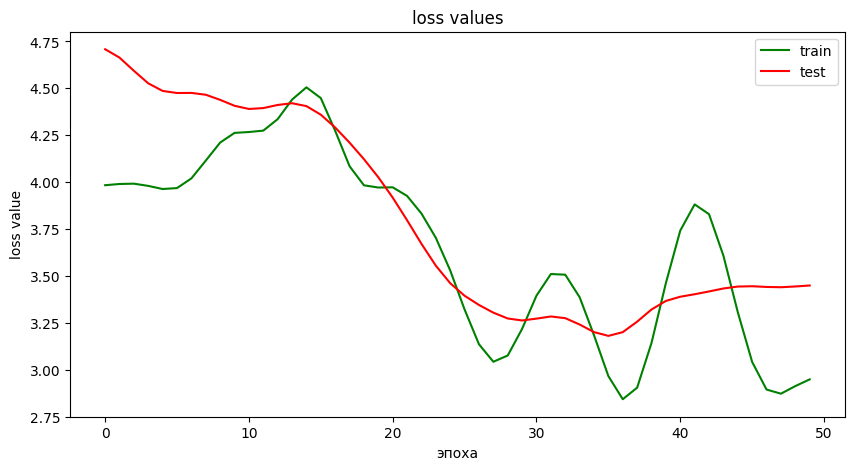

In [14]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set(title = 'loss values',
       xlabel = 'эпоха',
       ylabel = 'loss value')
train_loss_smoothed = gaussian_filter1d(train_loss_history, sigma=2)
ax.plot(train_loss_smoothed, color='green',  label='train')

test_loss_smoothed = gaussian_filter1d(test_loss_history, sigma=2)
ax.plot(test_loss_smoothed, color='red',  label='test')
ax.legend()
plt.show()

<ipython-input-15-2c6bb4c2f673>:1: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


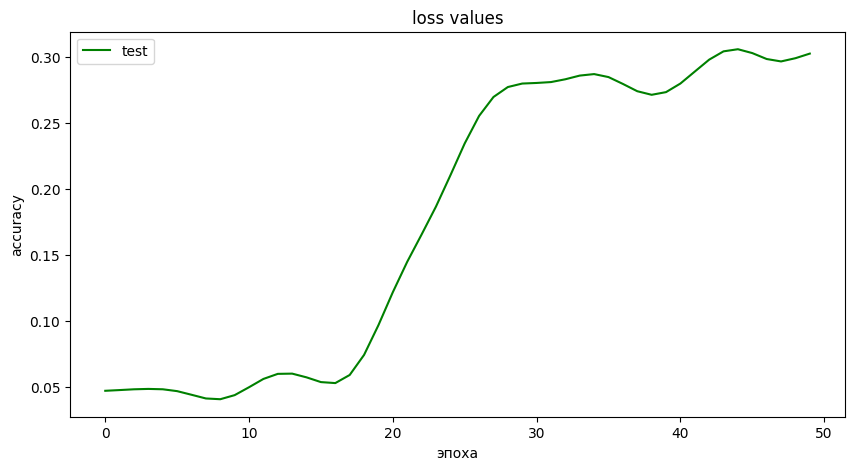

In [15]:
from scipy.ndimage.filters import gaussian_filter1d
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set(title = 'loss values',
       xlabel = 'эпоха',
       ylabel = 'accuracy')
test_accuracy_smoothed = gaussian_filter1d(test_accuracy_history, sigma=2)
ax.plot(test_accuracy_smoothed, color='green',  label='test')

ax.legend()
plt.show()

In [16]:
timg = X_test[7]

torch.save(timg,'tensor.pt')

In [17]:
y_test[7]

tensor(91, device='cuda:0')

In [18]:
timg.size()

torch.Size([3, 224, 224])

In [19]:
X_test.size()

torch.Size([32, 3, 224, 224])

In [20]:
!pip install dill

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.0 MB/s eta 0:00:00


In [21]:
import dill

with open("model.dill", "wb") as dill_file:
    dill.dump(vgg16, dill_file)

In [22]:
ifile = open("model.dill", "rb")
modelp = dill.load(ifile)
ifile.close()

test_data = torch.load('tensor.pt')

<ipython-input-22-552deb2ced84>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_data = torch.load('tensor.pt')


In [23]:
type(modelp)

__main__.VGG16

In [24]:
test_data.shape

torch.Size([3, 224, 224])

In [25]:
test_data = test_data.data.cpu()

In [26]:
t_data = torch.tensor([test_data.numpy()])

<ipython-input-26-6243146adcee>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  t_data = torch.tensor([test_data.numpy()])


In [27]:
t_data.shape

torch.Size([1, 3, 224, 224])

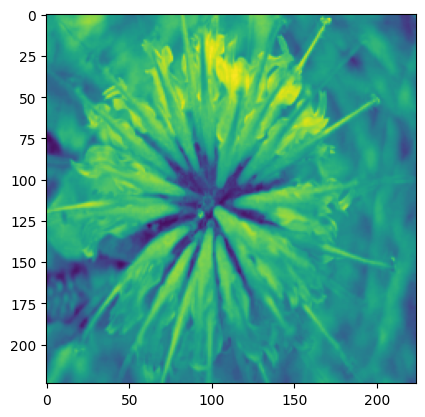

In [28]:
plt.imshow(test_data[0, :, :])
plt.show()

In [29]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

modelp.to(dev)
model_data = modelp.to(dev)

t_data = t_data.to(dev)

In [30]:
preds = modelp.forward(t_data)

In [31]:
print(preds)

tensor([[-18.6662, -17.8083, -27.2668, -34.1282, -31.6325, -28.9349, -25.8619,
         -20.1597, -28.2223, -24.9812, -27.5498, -27.5832, -21.0068, -24.8736,
         -23.2680, -23.7652, -19.6256, -16.8434, -19.2161, -20.7555, -24.7042,
         -23.6340, -25.8405, -28.9609, -35.2170, -35.6456, -26.9458, -23.8298,
         -21.2717, -27.7362, -29.9037, -29.1837, -13.7826, -14.8981, -23.0349,
         -20.5452, -26.7007, -27.6985, -33.6600, -22.5352, -16.0558, -27.7305,
         -19.0267, -20.2195, -19.6095, -29.9955, -31.1831, -27.8351, -15.1833,
         -31.4444, -10.8687, -18.4820, -20.2001, -31.3472, -19.6037, -24.9518,
         -18.6911, -38.9092, -33.1666, -29.8956, -36.3387, -19.7628, -20.8679,
         -22.0811, -21.5893, -20.4076, -17.3455, -22.6965, -23.0932, -12.9709,
         -26.3488, -19.8930, -13.3718, -20.6984, -20.9744, -15.6905, -19.4612,
         -17.8334, -30.5386, -22.9088, -16.4704, -14.4088, -17.6700, -24.4610,
         -22.9455, -19.6467, -20.7960, -21.6072, -24

In [32]:
prediction = np.argmin(preds.to('cpu').detach().numpy(),axis=-1)

In [33]:
print(prediction)

[57]


In [34]:
val_data = torchvision.datasets.Flowers102('./', split='val', transform=transform)

In [35]:
val_dataloader = DataLoader(val_data, batch_size=64, shuffle=True)
X_val, y_val = next(iter(val_dataloader))

In [36]:
timg1 = X_val[60]

torch.save(timg1,'tensor.pt')

In [37]:
y_val[60]

tensor(25)

In [38]:
with open("model.dill", "wb") as dill_file:
    dill.dump(vgg16, dill_file)

In [39]:
ifile = open("model.dill", "rb")
modelp = dill.load(ifile)
ifile.close()

val_data = torch.load('tensor.pt')

<ipython-input-39-b476f2de1429>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  val_data = torch.load('tensor.pt')


In [40]:
val_data.shape

torch.Size([3, 224, 224])

In [41]:
val_data = val_data.data.cpu()

In [42]:
v_data = torch.tensor([val_data.numpy()])

In [43]:
v_data.shape

torch.Size([1, 3, 224, 224])

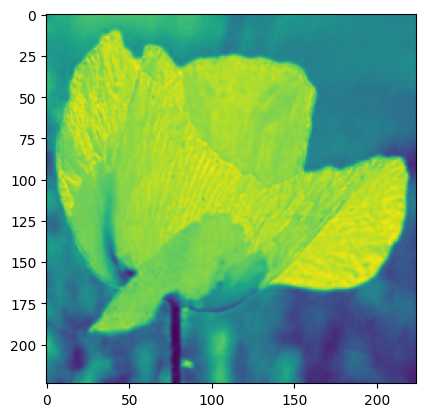

In [44]:
plt.imshow(val_data[0, :, :])
plt.show()

In [45]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

modelp.to(dev)
model_data = modelp.to(dev)

v_data = v_data.to(dev)

In [46]:
preds = modelp.forward(v_data)

In [47]:
print(preds)

tensor([[-70.2987, -49.1372, -89.6911, -99.3556, -67.6109, -60.8806, -98.3802,
         -42.1123, -84.0528, -62.1667, -70.8326, -51.7123, -38.3724, -46.4853,
         -66.7552, -75.9167, -57.4085, -56.2971, -71.3210, -75.2557, -88.0410,
         -71.2683, -53.7089, -67.5215, -85.9961, -90.0268, -88.5059, -67.6859,
         -47.3316, -62.1636, -67.3647, -71.3522, -52.5681, -77.1883, -43.8980,
         -69.1576, -58.9793, -62.7138, -88.8285, -62.1601, -46.3829, -65.6136,
         -67.1379, -44.3741, -82.5029, -66.1640, -64.2100, -66.9688, -54.5202,
         -56.7999, -35.7690, -51.9265, -72.2294, -65.9525, -67.1225, -55.6427,
         -46.6424, -66.7049, -67.3925, -43.9188, -76.5258, -62.8571, -68.3166,
         -71.2041, -57.8277, -55.7709, -64.4539, -77.6775, -61.8801, -52.1281,
         -62.6974, -70.9270, -41.7916, -72.0098, -65.1620, -65.3625, -44.0407,
         -55.5964, -63.2692, -66.6111, -40.6651, -50.3299, -60.4234, -76.6248,
         -72.7693, -66.2716, -58.5326, -66.2250, -54

In [48]:
prediction = np.argmin(preds.to('cpu').detach().numpy(),axis=-1)

In [49]:
print(prediction)

[3]
